In [2]:
import numpy as np

In [3]:
csv_file = "./data.csv"

import pandas as pd

df = pd.read_csv(csv_file)

df1 = df.iloc[:,0:2]
df2 = df.iloc[:,2:4]
df3 = df.iloc[:,4:6]

dfs = [df1,df2,df3]

# Change the column names 1-> Displacement, 2-> Force
#remove  nan values and 1st row
# set number type 
df_new = []
cursor = [1.1,195]

for df in dfs:
    df.columns = ["Displacement","Force"]
    df = df.dropna()
    df = df.drop([0,1])
    df["Displacement"] = df["Displacement"].astype(float)
    df["Force"] = df["Force"].astype(float)
    df["Displacement"] = df["Displacement"] - cursor[0]
    df["Force"] = df["Force"] - cursor[1]
    # add cero cero
    df = pd.concat([pd.DataFrame([[0,0]],columns=["Displacement","Force"]),df],ignore_index=True)
    df_new.append(df)

In [4]:
def intergrate(df,eps1):

    # find the index of the first element that is greater than eps1
    indx = df["Displacement"].searchsorted(eps1)[0]
    # get the values of the previous element
    
    return np.trapz(df["Force"].values[:indx],df["Displacement"].values[:indx])

def theta(x,eta):
    return np.arctan(eta*x)
def error(df,eps1,eps,Fmax,slope):

    integral = intergrate(df,eps1)

    F =  -integral  + eps1**2*slope/2 - Fmax*(eps-eps1)
    return F**2
    

F_eq = [2956.86607833]
F_eq = [3560.87649705]
F_eq = [3966.28466906]


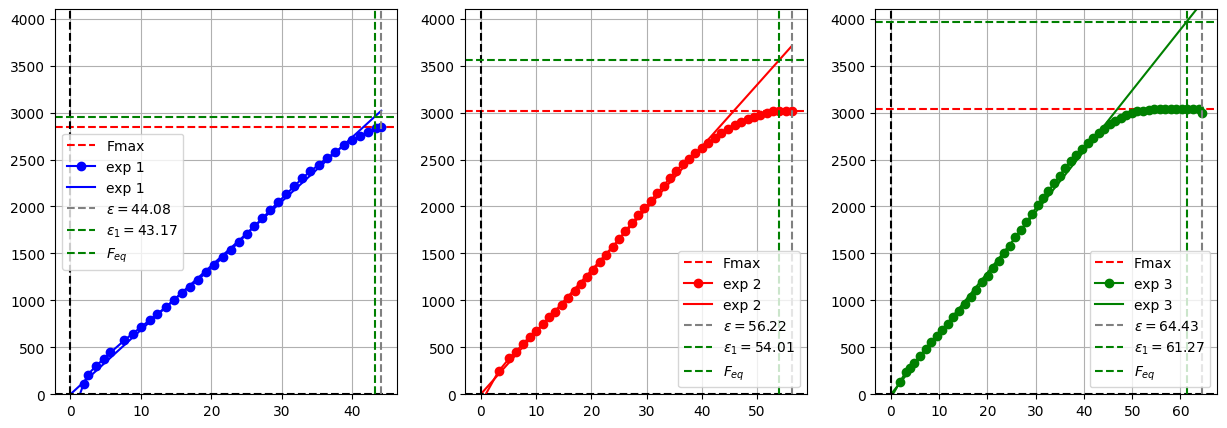

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
## optimize with constraints
from scipy.optimize import minimize

fig = plt.figure(figsize=(15,5))
colors = ["blue","red","green"]

Feq_list = []
for i,df in enumerate(df_new):
    plt.subplot(1,3,i+1)
    D_span = np.linspace(0,df["Displacement"].max(),100)
    ##linear regression
    nlen = len(df["Displacement"])
    nlen = int(nlen/2)
    slope, intercept, r_value, p_value, std_err = linregress(df["Displacement"][:nlen],
                                                             df["Force"][:nlen])


    # Correct the intercept 
    df["Force"] = df["Force"] - intercept


    Fmax = df["Force"].max()
    eps   = df["Displacement"].max()

    error_f = lambda eps1: error(df,eps1,eps,Fmax,slope)

    ## optimize 
    eps_0 = eps
    limits = [eps/2,eps]
    res = minimize(error_f,eps_0,method='L-BFGS-B',bounds=[limits])
    eps1 = res.x
    

    plt.axhline(y=Fmax, color='r', linestyle='--',label="Fmax")
    plt.plot(df["Displacement"],df["Force"],marker="o",color=colors[i],label=f"exp {i+1}")

    A = np.trapz(df["Force"],df["Displacement"]) 
    plt.plot(D_span, D_span*slope ,label=f"exp {i+1}",color=colors[i])
    # plot xaxis and yaxis
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')

    plt.axvline(x=eps, color='gray', linestyle='--',label=r"$\epsilon = {:.2f}$".format(eps))
    plt.axvline(x=eps1, color='g', linestyle='--',label=r"$\epsilon_1 = {:.2f}$".format(eps1[0]))

    Feq = eps1*slope
    Feq_list.append(Feq[0])
    print(f"F_eq = {Feq}")
    plt.axhline(y=Feq, color='g', linestyle='--',label=r"$F_{eq}$")
    plt.legend()
    plt.grid()
    plt.ylim(0,4100)

In [6]:
Feq_list = np.array(Feq_list)/1e3

In [7]:
Feq_list

array([2.95686608, 3.5608765 , 3.96628467])

In [8]:
np.mean(Feq_list)

3.494675748147254

In [11]:
3.25 *(64 + 15) 

256.75